# 6-1. 군집 알고리즘

# 군집 알고리즘

## 과일 사진 데이터 준비하기

In [ ]:
# 과일 사진 데이터 준비
# 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진
# 우선 파일을 다운로드해야 함.
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-11 06:07:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-11 06:07:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-11 06:07:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 넘파이에서 npy 파일 로드하는 방법 np.load()
fruits = np.load('fruits_300.npy')

In [ ]:
# 첫 번째 차원: 샘플의 개수, 두 번째 차원: 이미지 높이, 세 번째 차원: 이미지 너비
print(fruits.shape)

(300, 100, 100)


In [ ]:
# 첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


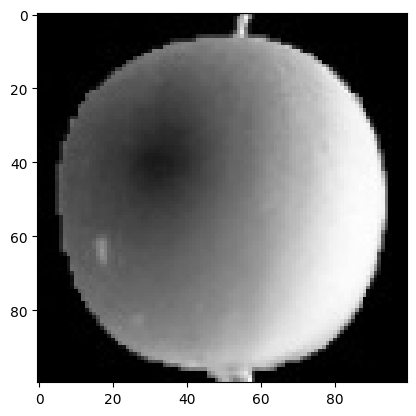

In [ ]:
# 첫 번째 행이 위에서 출력한 배열 값에 해당
# 0에 가까울수록 검게 나타나고 높은 값은 밝게

plt.imshow(fruits[0], cmap='gray')
plt.show()

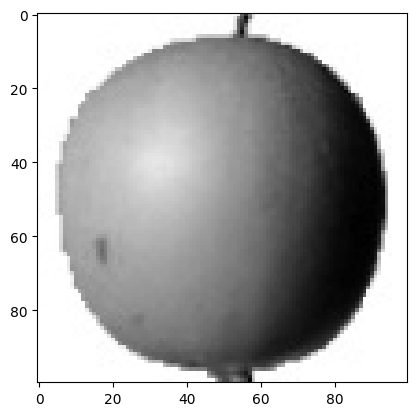

In [ ]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

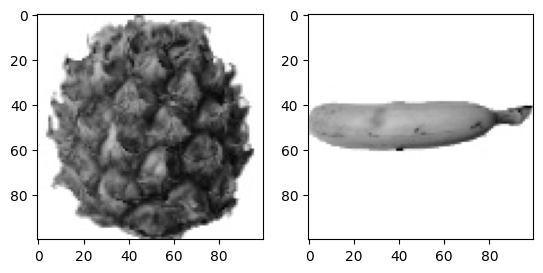

In [ ]:
# 파인애플, 바나나 출력
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()

In [ ]:
# fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용
# reshape() 메서드를 사용해 두 번째 차원(100), 세 번째 차원(100)을 10,000으로 합침
# 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원 할당

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
# apple 배열의 mean() 메서드로 각 샘플의 픽셀 평균값 계산
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


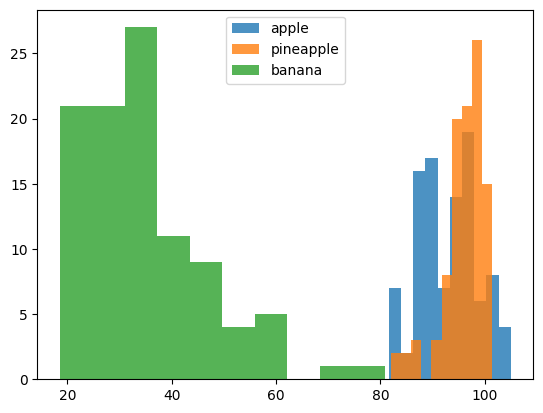

In [ ]:
# 히스토그램을 그려서 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있음
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

> - 히스토그램을 보면 바나나 사진의 평균값은 40 아래에 집중되어 있음.
> - 사과와 파인애플은 90~100사이에 많이 모여 있음
> - 바나나는 사진에서 차지하는 영역이 작기 떄문에 평균값이 작음


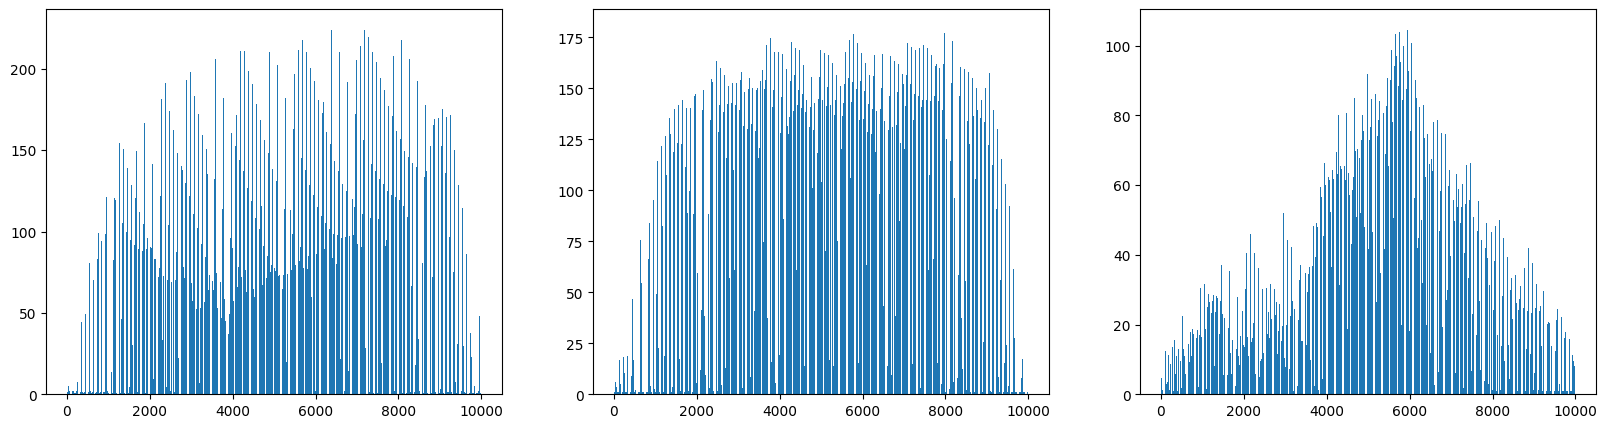

In [ ]:
# 샘플의 평균값이 아니라 픽셀별 평균값을 비교해보면 어떨까.
# 전체 샘플에 대해 각 픽셀의 평균을 계산함
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

> - 순서대로 사과, 파인애플, 바나나 그래프
- 3개의 그래프를 보면 과일마다 값이 높은 구간이 다름
- 사과는 사진 아래쪽으로 갈수록 값이 높아지고, 파인애플 그래프는 비교적 고르면서 높음
- 바나나는 중앙의 픽셀값이 높음

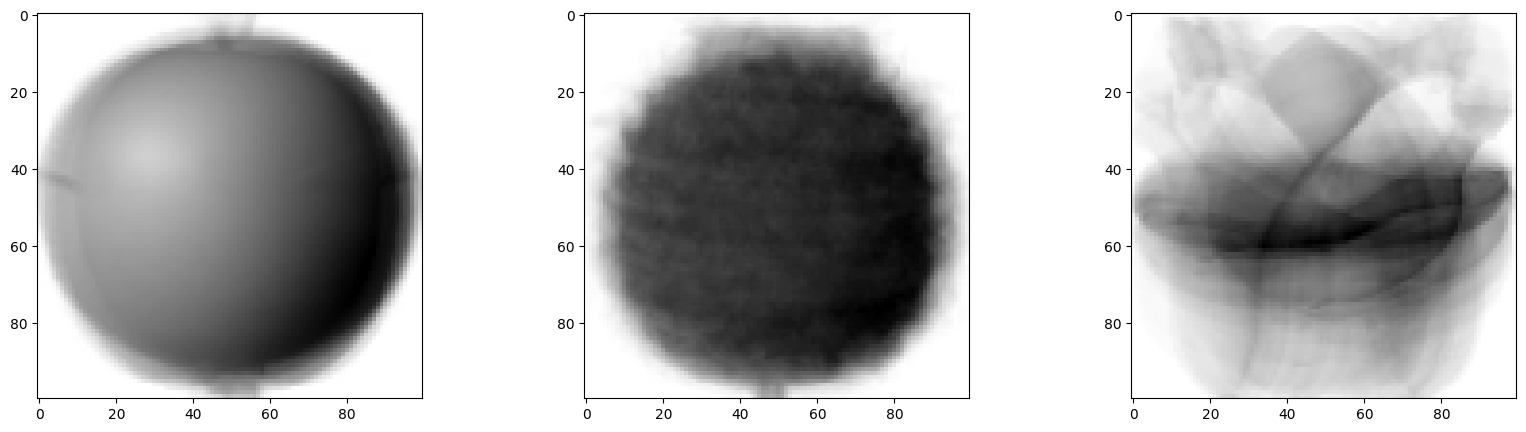

In [ ]:
# 픽셀 평균값을 100 X 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교할 수 있음
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


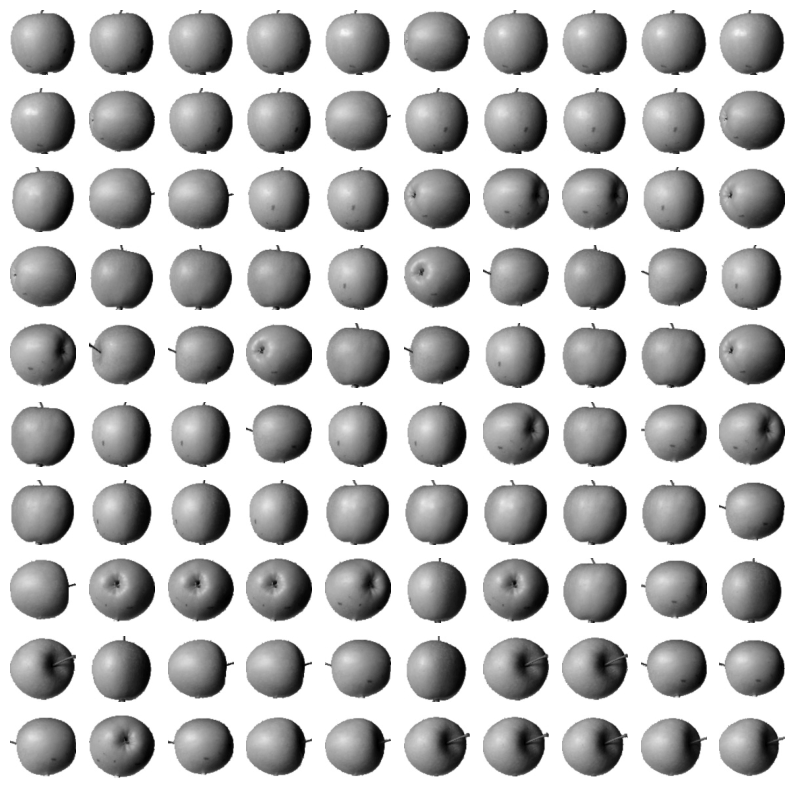

In [ ]:
# 이 값이 가장 작은 순서대로 100개를 고름
# 즉, apple_mean과 오차가 가장 작은 샘플 100개
# np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환함
# 이 인덱스 중에서 처음 100개를 선택해 10 x 10 격자로 이루어진 그래프를 그림

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10)) # subplot() 함수로 10 x 10, 총 100개의 서브 그래프 생성
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off') # off로 좌표축 그리지 않음
plt.show()

## 핵심 포인트
>- **비지도 학습**은 머신러닝의 한 종류로 훈련 데이터에 타깃이 없음. 타깃이 없기 때문에 외부의 도움 없이 스스로 유용한 무언가를 학습해야 함
- **히스토그램**은 구간별로 값이 발생한 빈도를 그래프로 표시한 것
- **군집**은 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습

## 확인 문제

> - 1. 히스토그램을 그릴 수 있는 맷플롯립 함수는?


# 6-2. K-평균

# K-평균

### K-평균 알고리즘 소개

> 1. 무작위로 k개의 클러스터 중심을 정함
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 변경
4. 클러스터 중ㅅ미에 변화가 없을 때까지 2번으로 돌아가 반복



## KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-11 07:10:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-11 07:10:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-11 07:10:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장
# labels_ 배열의 길이는 샘플 개수와 같음
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


> - 첫 번째 클러스터(레이블0)가 111개 샘플, 두 번째 클러스터(레이블 1)가 98개의 샘플, 세 번째 클러스터(레이블2)는 91개의 샘플
- 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리티 함수 draw_fruits()를 만들겠음

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수
  # 한줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산하면 됨
    rows = int(np.ceil(n/10))
  #행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

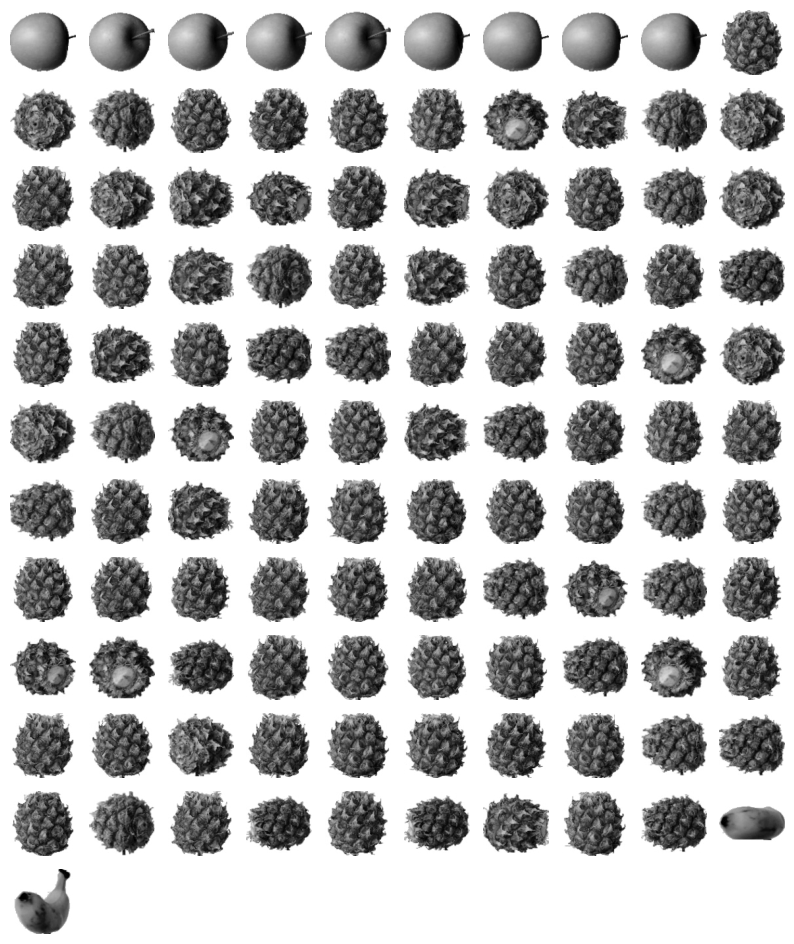

In [ ]:
draw_fruits(fruits[km.labels_==0])

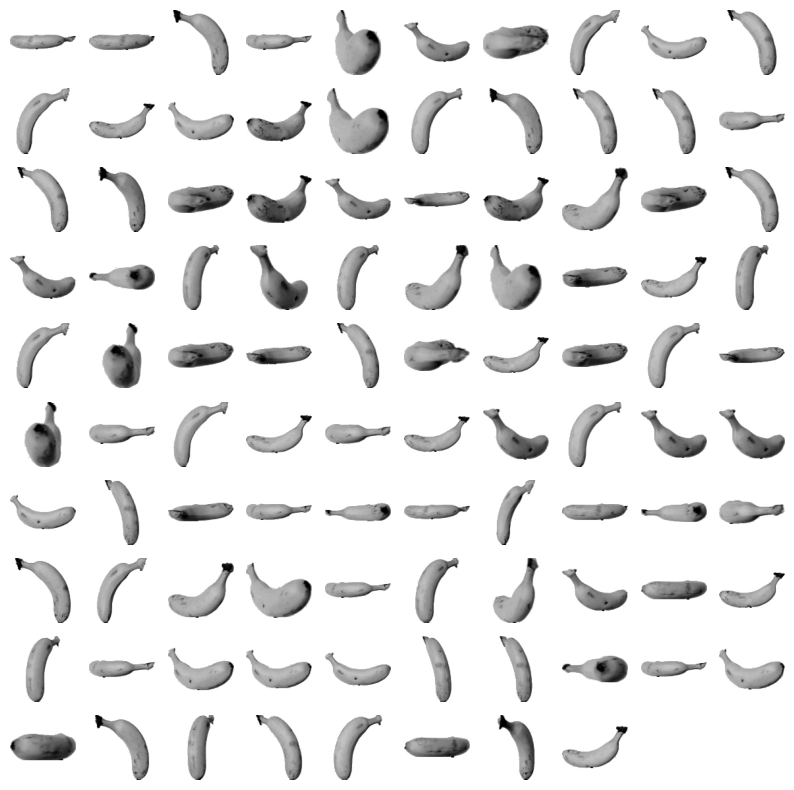

In [ ]:
draw_fruits(fruits[km.labels_==1])

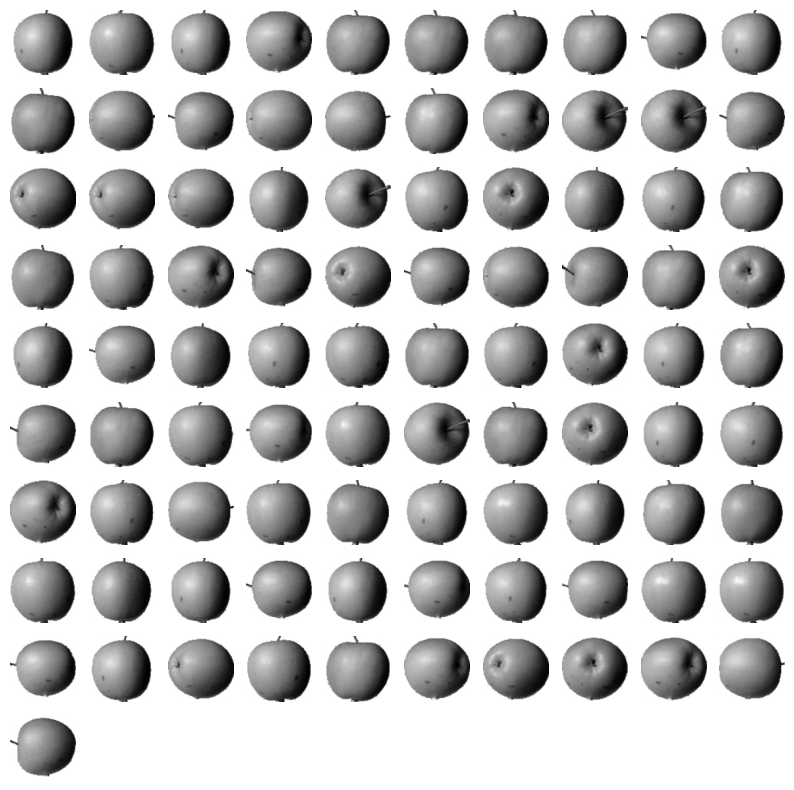

In [ ]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

> - KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장
- 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력하려면 100 x 100 크기의 2차원 배열로 바꿔야 함

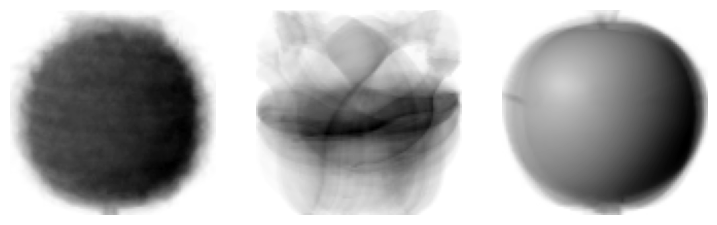

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
# KMeans 클래스는 가장 까까운 클러스터중심을 예측 클래스로 출력하는 predict() 메서드를 제공
print(km.predict(fruits_2d[100:101]))

[0]


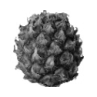

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
# 알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_ 속성에 저장
print(km.n_iter_)

4


## 최적의 k 찾기

### 엘보우 방법

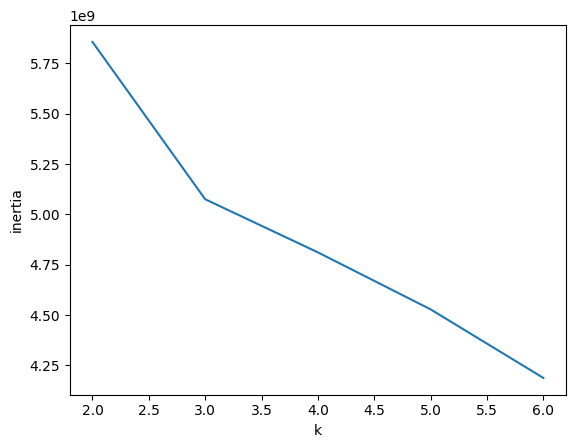

In [ ]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 핵심 포인트

> - **k-평균 알고리즘**은 처음에 랜덤하게 클러스터 중심을 정하고 클러스터를 만듬. 그다음 클러스터의 중심을 이동하고 다시 클러스터를 만드는 식으로 반복해서 최적의 클러스터를 구성함
- **클러스터 중심**은 k-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값
- **엘보우 방법**은 최적의 클러스터 개수를 정하는 방법 중 하나


## 핵심 패키지와 함수
### sickit-learn
- KMeans는 k-평균 알고리즘 클래스
n_cluster에는 클러스터 개수를 지정. 기본값은 8.


## 확인
> 1. k-평균 알고리즘에서 클러스터를 표현하는 방법은?
2. k-평균에서 최적의 클러스터 개수는 어떻게 정할 수 있나.


# 6-3. 주성분 분석

# 주성분 분석

## 차원과 차원 축소


- 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈.
- 머신러닝에서는 이런 특성을 차원이라고 부름
- 10,000개의 특성은 결국 10,000개의 차원

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-11 07:45:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-11 07:45:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-11 07:45:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
# 사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공
# PCA  클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 함
# k-평균과 마찬가지로 비지도 학습이기 떄문에 fit() 메서드에 타깃값은 제공하지 않음

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

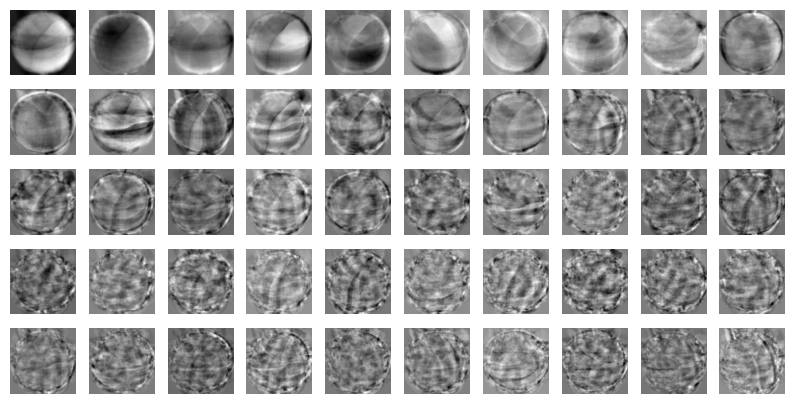

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

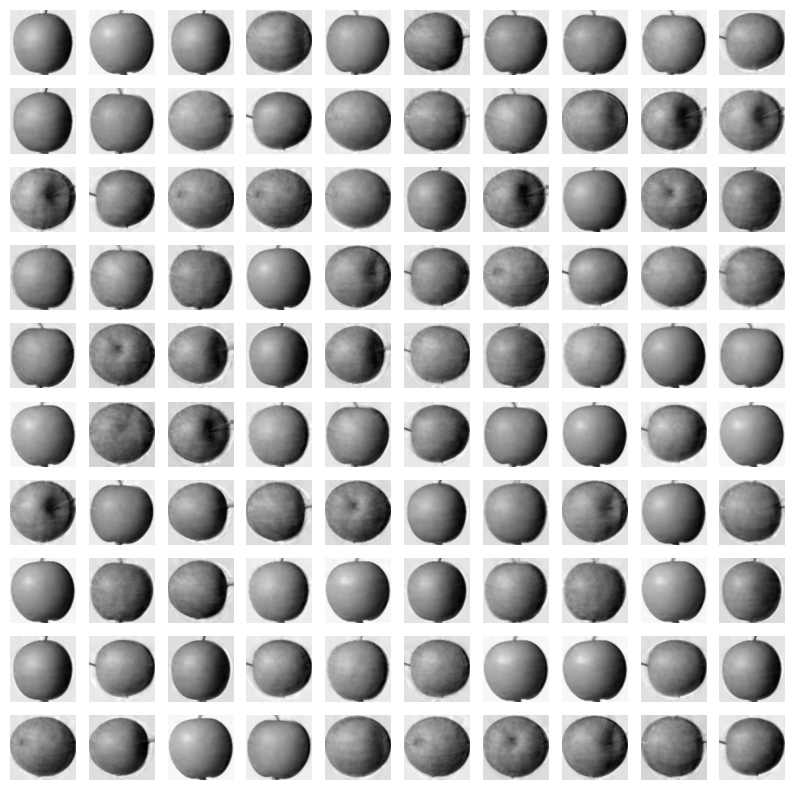

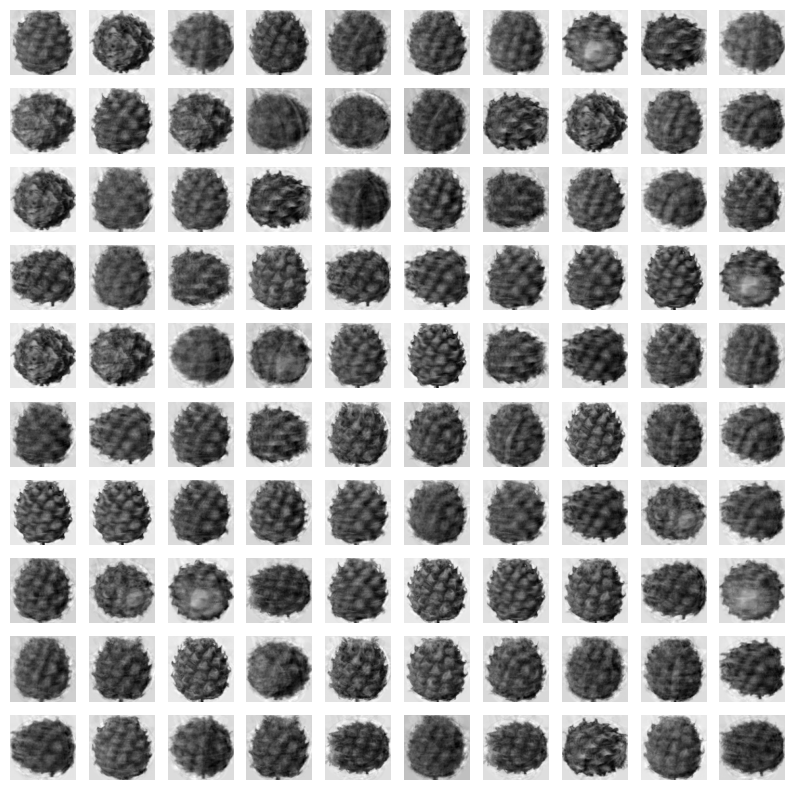

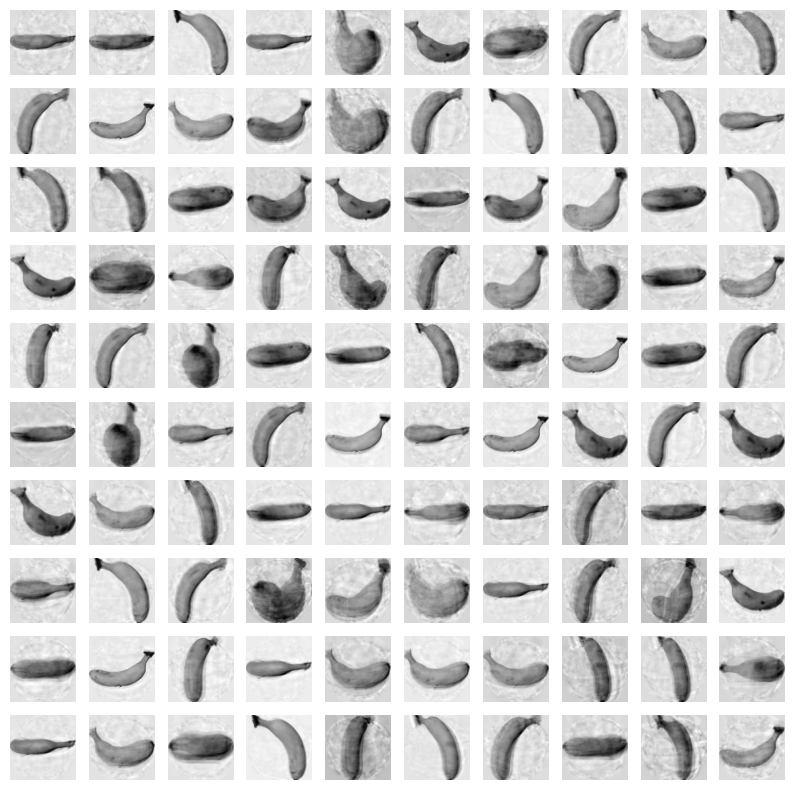

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215495207544


- 92%가 넘는 분산을 유지하고 있음


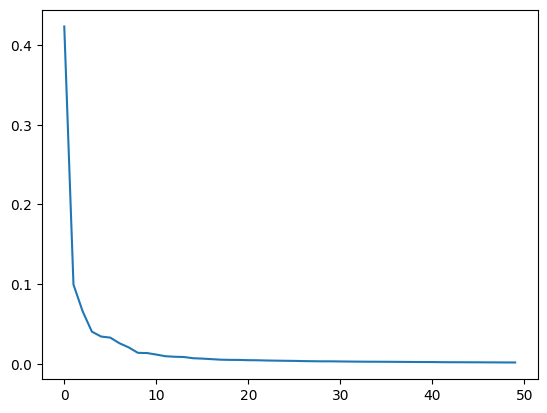

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [ ]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
# 지도 학습 모델을 사용하려면 타깃값이 있어야 함
# 사과 0, 파인애플 1, 바나나 2로 지정
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.2010104179382326


- 교차 검증의 점수는 0.997 정도로 매우 높음

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.08943729400634766


- 50개의 특성만 사용했는데도 정확도가 100%이고 훈련 시간은 0.03초로 20배 이상 감소

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


- 단 2개! 2개의 특성만으로 원본 데이터 분산 50% 표현 가능

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03151016235351563


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘 클러스터
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


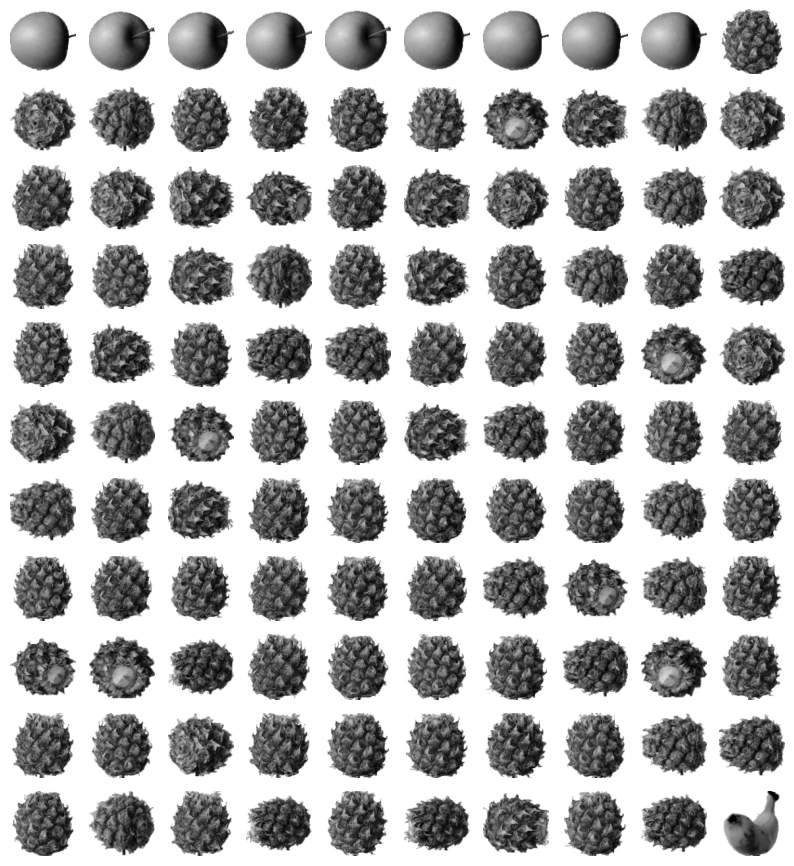

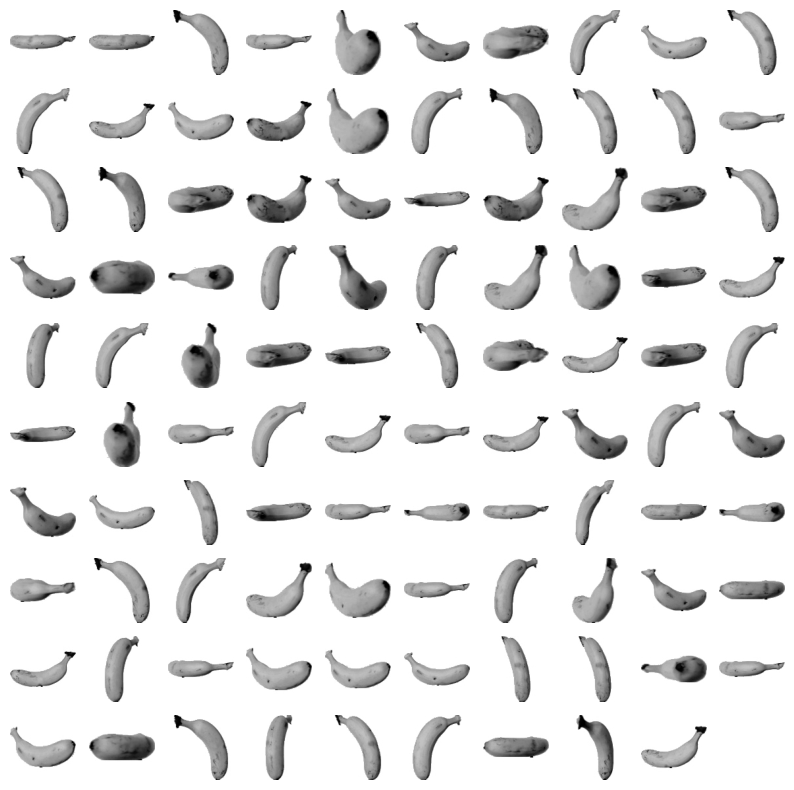

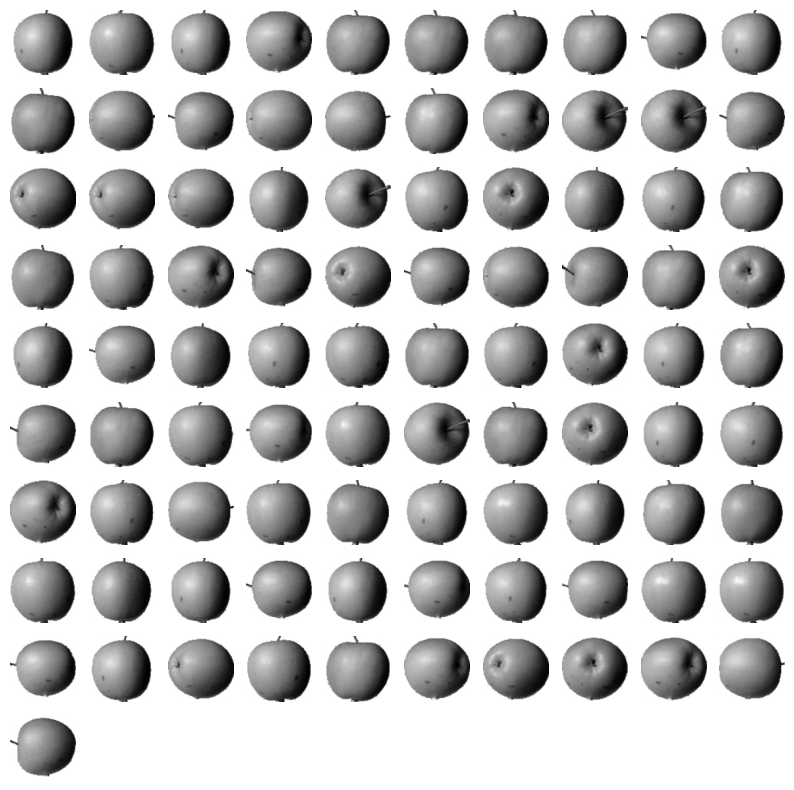

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

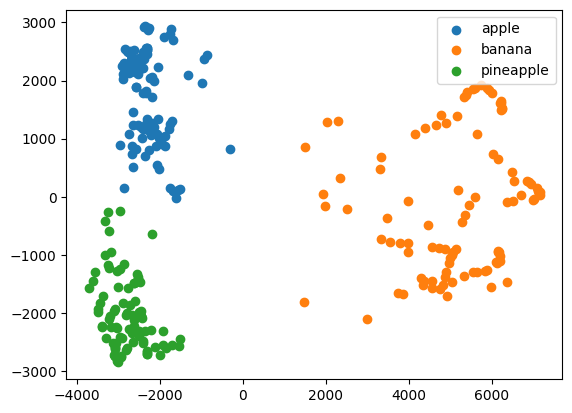

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()